In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import pickle

Notes from spatial analysis section:

LST histogram, cloud coverage and when maybe, 
One by histogram, each city has a colored line, statistical outliers

All data analysis. General properties of the dataset

In [2]:
dataset_root = '/afs/shell.umd.edu/project/gcurbanheat/shared/urban_heat_dataset/'

In [3]:
cities = [
    'Jacksonville', 'DMV', 'NYC', 'Phoenix', 'Miami', 'Chicago', 'Denver', 'Seattle', 'San_Francisco', 'Los_Angeles', 'Atlanta', 'Toronto',
    'Mexico_City', 'Las_Vegas', 'Salt_Lake_City', 'Dallas', 'Houston', 'New_Orleans', 'St_Louis', 'Minneapolis',
    'Charlotte', 'Philadelphia', 'San_Diego', 'San_Juan', 'Montreal', 'Guadalajara', 'Monterrey', 'Cancun', 'Billings', 'Guatemala_City',
    'San_Jose', 'Havana', 'Santo_Domingo', 'Tegucigalpa', 'Managua', 'Panama_City', 'Bogota', 'Lima', 'Quito', 'Santiago', 'Buenos_Aires',
    'Sao_Paulo', 'Manaus', 'Punta_Arenas', 'La_Paz', 'Montevideo', 'Brasilia', 'Caracas'
]

In [38]:
city = 'DMV'
city_list = glob.glob(dataset_root+city+'/processed_Landsat/*')
city_list

['/afs/shell.umd.edu/project/gcurbanheat/shared/urban_heat_dataset/DMV/processed_Landsat/Landsat_Sentinel_image_DMV_202201081546.nc',
 '/afs/shell.umd.edu/project/gcurbanheat/shared/urban_heat_dataset/DMV/processed_Landsat/Landsat_Sentinel_image_DMV_202201241546.nc',
 '/afs/shell.umd.edu/project/gcurbanheat/shared/urban_heat_dataset/DMV/processed_Landsat/Landsat_Sentinel_image_DMV_202202091546.nc',
 '/afs/shell.umd.edu/project/gcurbanheat/shared/urban_heat_dataset/DMV/processed_Landsat/Landsat_Sentinel_image_DMV_202202251546.nc',
 '/afs/shell.umd.edu/project/gcurbanheat/shared/urban_heat_dataset/DMV/processed_Landsat/Landsat_Sentinel_image_DMV_202203131546.nc',
 '/afs/shell.umd.edu/project/gcurbanheat/shared/urban_heat_dataset/DMV/processed_Landsat/Landsat_Sentinel_image_DMV_202203291546.nc',
 '/afs/shell.umd.edu/project/gcurbanheat/shared/urban_heat_dataset/DMV/processed_Landsat/Landsat_Sentinel_image_DMV_202204141546.nc',
 '/afs/shell.umd.edu/project/gcurbanheat/shared/urban_heat_dat

In [105]:
city_data = []

for city in cities:
    print(city)
    city_list = glob.glob(dataset_root+city+'/processed_Landsat/*')
    for file in city_list:
        data = xr.open_dataset(file)['Landsat_LST'].values
        city_data.append(np.nanmedian(data))

Jacksonville
DMV
NYC
Phoenix
Miami
Chicago
Denver
Seattle
San_Francisco
Los_Angeles
Atlanta
Toronto
Mexico_City
Las_Vegas
Salt_Lake_City
Dallas
Houston
New_Orleans
St_Louis
Minneapolis
Charlotte
Philadelphia
San_Diego
San_Juan
Montreal
Guadalajara
Monterrey
Cancun
Billings
Guatemala_City
San_Jose
Havana
Santo_Domingo
Tegucigalpa
Managua
Panama_City
Bogota
Lima
Quito
Santiago
Buenos_Aires
Sao_Paulo
Manaus
Punta_Arenas
La_Paz
Montevideo
Brasilia
Caracas


In [106]:
with open('/home/jonstar/scratch.gcurbanheat/all_LSTs.pkl', 'wb') as file:
    pickle.dump(city_data, file)

Atlanta
Billings
Bogota
Brasilia
Buenos_Aires
Cancun
Caracas
Charlotte
Chicago
DMV
Dallas
Denver
Guadalajara
Guatemala_City
Havana
Houston
Jacksonville
La_Paz
Las_Vegas
Lima
Los_Angeles
Managua
Manaus
Mexico_City
Miami
Minneapolis
Monterrey
Montevideo
Montreal
NYC
New_Orleans
Panama_City
Philadelphia
Phoenix
Punta_Arenas
Quito
Salt_Lake_City
San_Diego
San_Francisco
San_Jose
San_Juan
Santiago
Santo_Domingo
Sao_Paulo
Seattle
St_Louis
Tegucigalpa
Toronto


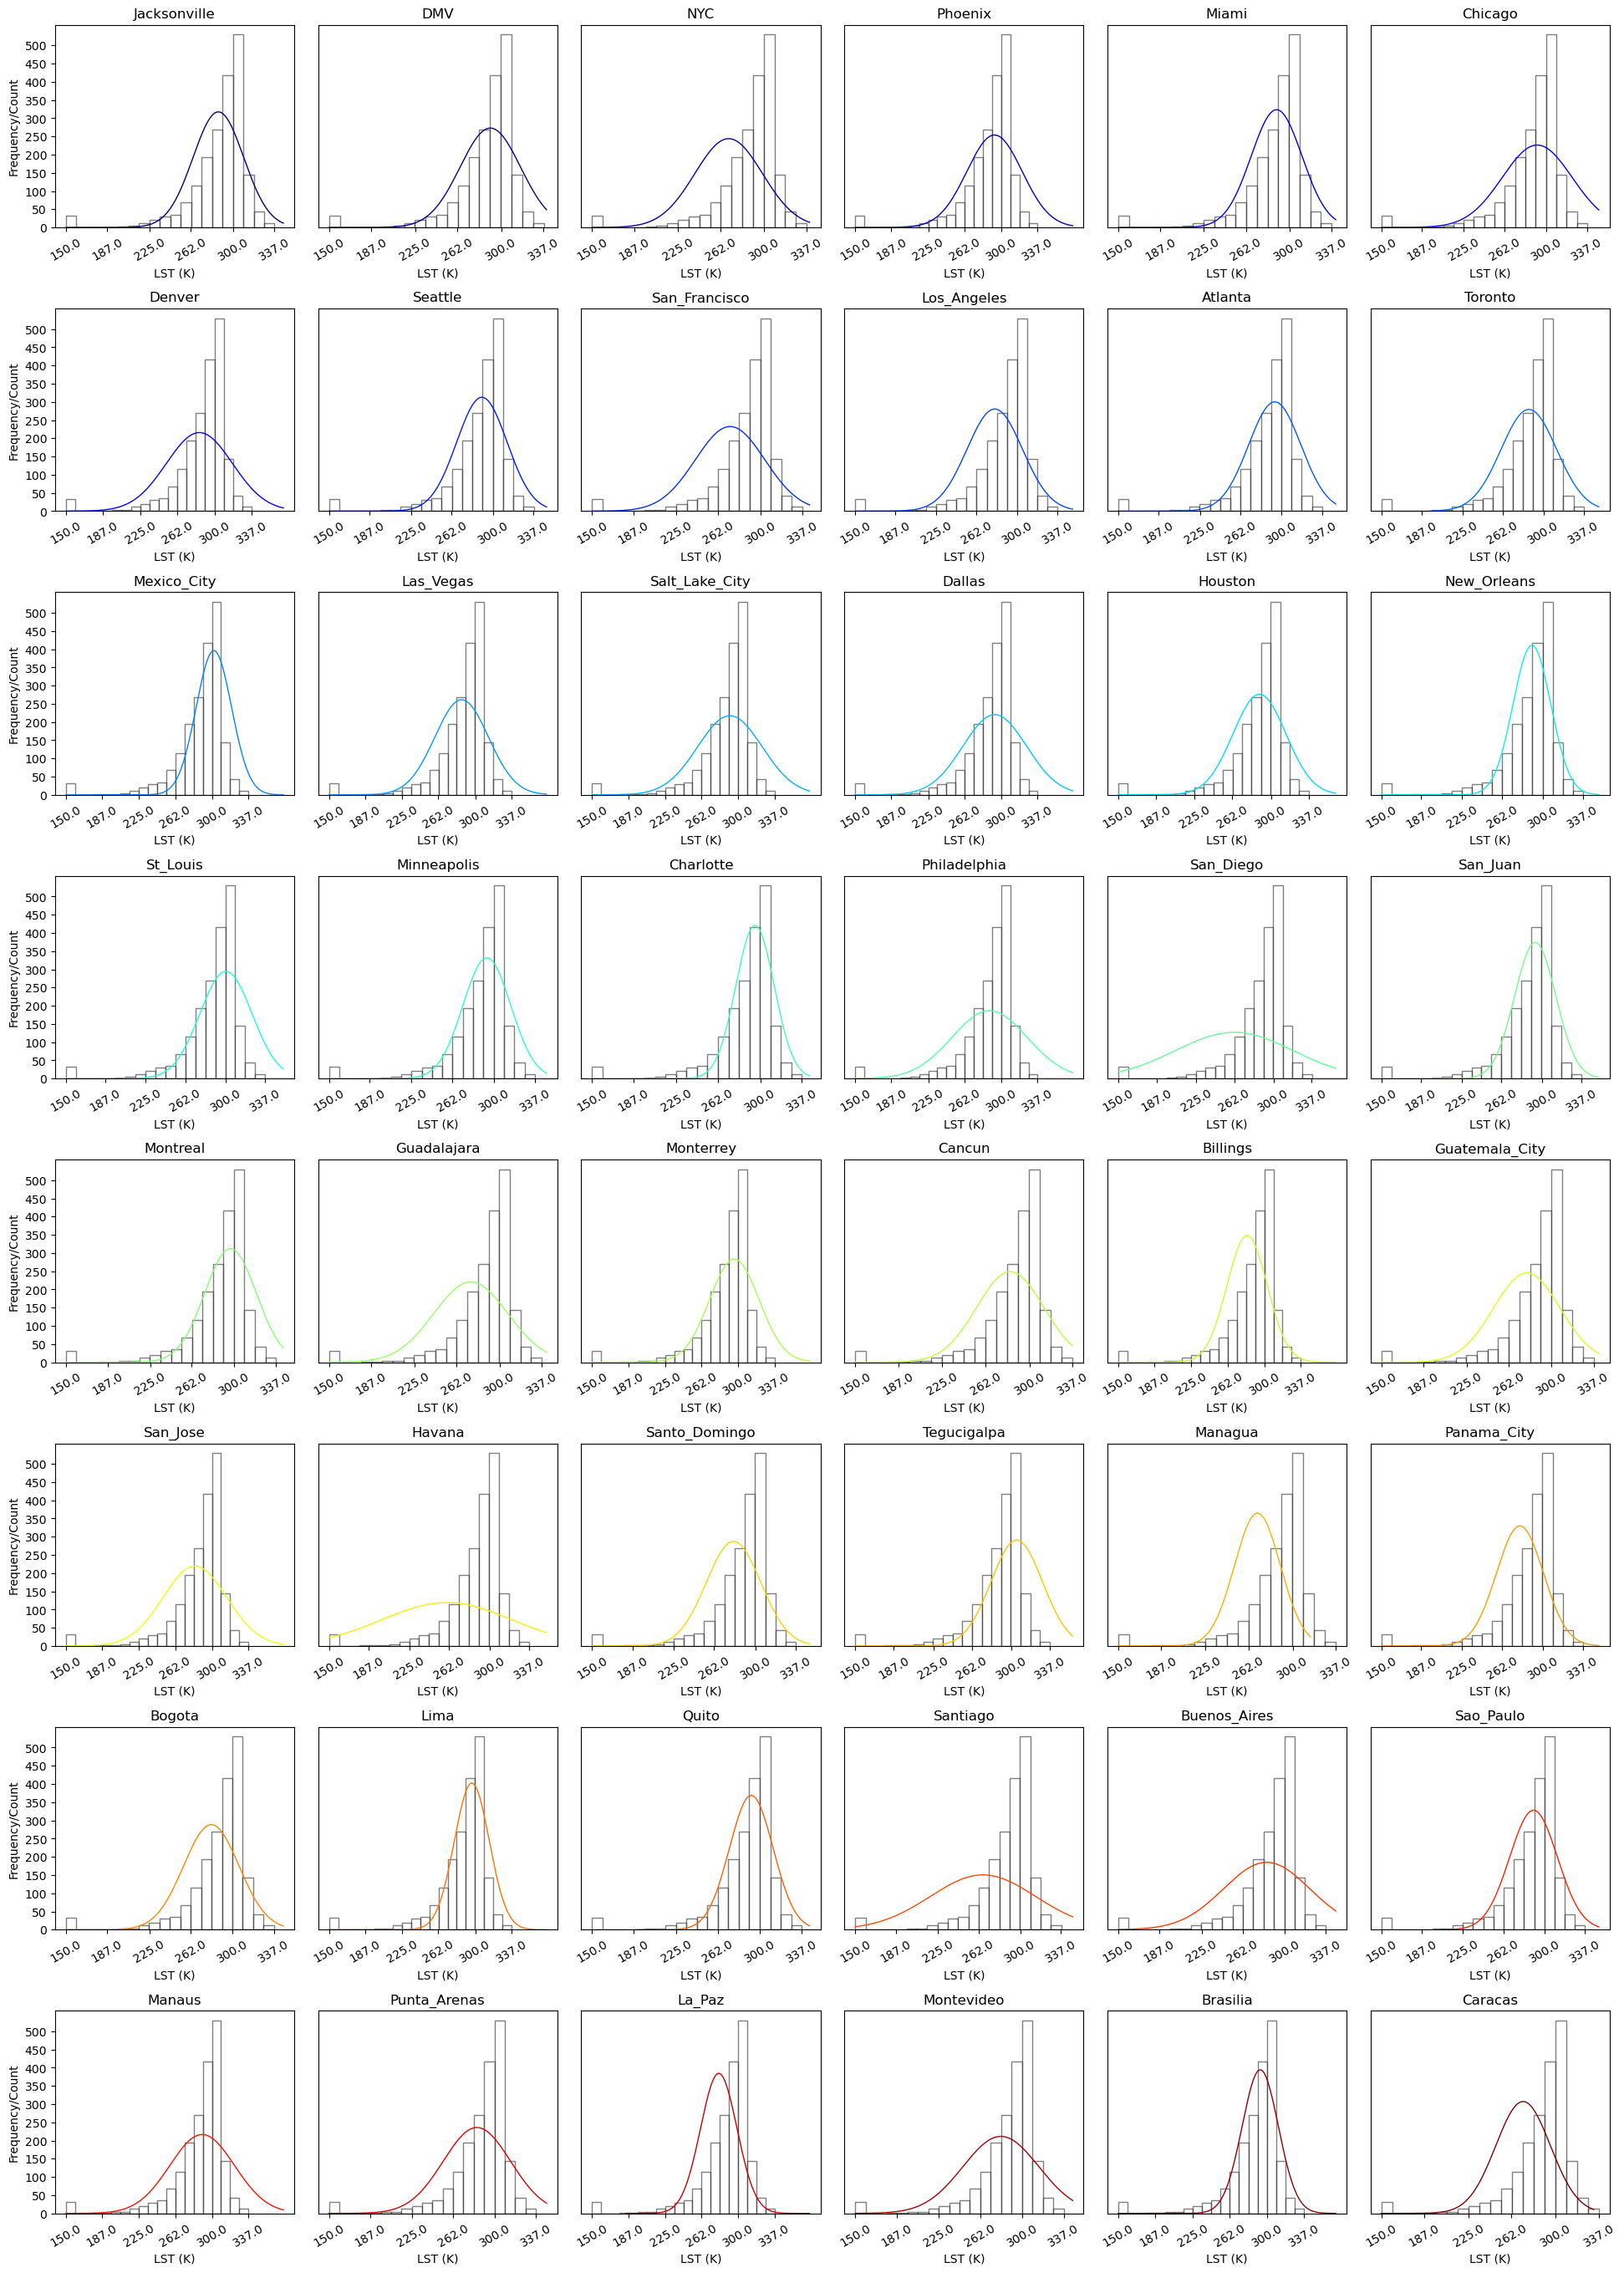

In [119]:
counts, bin_edges = np.histogram(city_data, bins=20)
area = np.sum(counts*(np.nanmax(city_data)-np.nanmin(city_data))/20)

fig, axs = plt.subplots(8, 6)
fig.set_size_inches(24, 34)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.subplots_adjust(hspace=0.4, wspace=0.1)
colors = cm.jet(np.linspace(0, 1, 48))

#box.plot(date_dict[cities[i]], cloud_dict[cities[i]], color=colors[i])
#box.set_xticks(date_dict[cities[i]][::4], labels=date_str_dict[cities[i]][::4], rotation=45)
#box.set_yticks(np.arange(0,1.01,0.2))
        
i = 0
for ax in axs:
    for box in ax:
        city = sorted(cities)[i]
        print(city)
        arrs = []
        city_list = glob.glob(dataset_root+city+'/processed_Landsat/*')
        for file in city_list:
            data = xr.open_dataset(file)['Landsat_LST'].values
            arrs.append(data)
        
        data = np.stack(arrs)
        
        mean = np.nanmean(data)
        std_dev = np.nanstd(data)
        x = np.linspace(np.nanmin(data), np.nanmax(data), 1000)
        pdf = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
        
        # Plot the line
        box.plot(x, pdf * area, color=colors[i], linewidth=1)
        box.hist(city_data, bins=20, alpha=0.5, color='white', edgecolor='black')
        box.set_xticks(np.round(bin_edges)[::4], labels=np.round(bin_edges)[::4], rotation=30)
        box.set_xlabel('LST (K)')
        if i % 6 == 0:
            box.set_yticks(np.arange(0,np.max(counts)+1,50))
            box.set_ylabel('Frequency/Count')
        box.set_title(cities[i])
        i += 1
        #if i > 5:
        #    break

#plt.hist(city_data, bins=20, alpha=0.5, color='white', edgecolor='black')
#fig.suptitle('Histogram of Median LST by File and PDFs of LST for Each City')
#plt.xlabel('LST (K)')
#plt.ylabel('Frequency/Count')
#plt.legend(cities, loc='upper left')
plt.show()

In [ ]:
city_data = []

for city in cities:
    print(city)
    city_list = glob.glob(dataset_root+city+'/processed_Landsat/*')
    for file in city_list:
        data = xr.open_dataset(file)['Landsat_LST'].values
        city_data.append(np.nanmedian(data))

In [34]:
ds = xr.open_dataset(city_list[0])
ds

<xarray.Dataset> Size: 936MB
Dimensions:                    (y: 3000, x: 3000)
Coordinates:
  * x                          (x) float64 24kB 4.016e+05 ... 4.915e+05
  * y                          (y) float64 24kB 3.287e+06 ... 3.377e+06
    datetime                   object 8B ...
Data variables: (12/14)
    Landsat_blue_reflectance   (y, x) float64 72MB ...
    Landsat_green_reflectance  (y, x) float64 72MB ...
    Landsat_red_reflectance    (y, x) float64 72MB ...
    Landsat_NIR_reflectance    (y, x) float64 72MB ...
    Landsat_SWIR1_reflectance  (y, x) float64 72MB ...
    Landsat_SWIR2_reflectance  (y, x) float64 72MB ...
    ...                         ...
    Sentinel1_VV               (y, x) float64 72MB ...
    Sentinel1_VH               (y, x) float64 72MB ...
    Sentinel1_HH               (y, x) float64 72MB ...
    Sentinel1_HV               (y, x) float64 72MB ...
    Sentinel1_angle            (y, x) float64 72MB ...
    spatial_ref                int32 4B ...
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [7]:
cloud = np.array([[s[-4] for s in line] for line in ds.Landsat_cloud_mask.values])
cloud

array([['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ...,
       ['0', '1', '1', ..., '0', '0', '0'],
       ['0', '1', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0']],
      shape=(3000, 3000), dtype='<U1')

In [9]:
np.sum(cloud == '1')/3000**2

np.float64(0.15107233333333334)

In [88]:
def index(bit):
    if type(bit) == str:
        if bit == 'nan':
            return False
        else:
            return str(int(float(bit)))[-4] == '1'
    else:
        if np.isnan(bit):
            return False
        else:
            return str(int(bit))[-4] == '1'

func = np.vectorize(index)

In [67]:
cloud_dict = {string: [] for string in cities}
cloud_dict

{'DMV': [],
 'NYC': [],
 'Phoenix': [],
 'Miami': [],
 'Chicago': [],
 'Denver': [],
 'Seattle': [],
 'San_Francisco': [],
 'Los_Angeles': [],
 'Atlanta': [],
 'Toronto': [],
 'Mexico_City': [],
 'Las_Vegas': [],
 'Salt_Lake_City': [],
 'Dallas': [],
 'Houston': [],
 'New_Orleans': [],
 'St_Louis': [],
 'Minneapolis': [],
 'Jacksonville': [],
 'Charlotte': [],
 'Philadelphia': [],
 'San_Diego': [],
 'San_Juan': [],
 'Montreal': [],
 'Guadalajara': [],
 'Monterrey': [],
 'Cancun': [],
 'Billings': [],
 'Guatemala_City': [],
 'San_Jose': [],
 'Havana': [],
 'Santo_Domingo': [],
 'Tegucigalpa': [],
 'Managua': [],
 'Panama_City': [],
 'Bogota': [],
 'Lima': [],
 'Quito': [],
 'Santiago': [],
 'Buenos_Aires': [],
 'Sao_Paulo': [],
 'Manaus': [],
 'Punta_Arenas': [],
 'La_Paz': [],
 'Montevideo': [],
 'Brasilia': [],
 'Caracas': []}

In [90]:
city_data = []

for city in cities:
    print(city)
    city_list = glob.glob(dataset_root+city+'/processed_Landsat/*')
    for file in city_list:
        #print(file)
        data = xr.open_dataset(file)['Landsat_cloud_mask'].values
        cloud = func(data)
        cloud_frac = np.sum(cloud)/3000**2
        city_data.append(cloud_frac)
        cloud_dict[city].append(cloud_frac)

Jacksonville
DMV
NYC
Phoenix
Miami
Chicago
Denver
Seattle
San_Francisco
Los_Angeles
Atlanta
Toronto
Mexico_City
Las_Vegas
Salt_Lake_City
Dallas
Houston
New_Orleans
St_Louis
Minneapolis
Charlotte
Philadelphia
San_Diego
San_Juan
Montreal
Guadalajara
Monterrey
Cancun
Billings
Guatemala_City
San_Jose
Havana
Santo_Domingo
Tegucigalpa
Managua
Panama_City
Bogota
Lima
Quito
Santiago
Buenos_Aires
Sao_Paulo
Manaus
Punta_Arenas
La_Paz
Montevideo
Brasilia
Caracas


In [46]:
with open('/home/jonstar/scratch.gcurbanheat/all_cloud_fracs.pkl', 'wb') as file:
    pickle.dump(city_data, file)
with open('/home/jonstar/scratch.gcurbanheat/city_cloud_dicts.pkl', 'wb') as file:
    pickle.dump(cloud_dict, file)

In [47]:
with open('/home/jonstar/scratch.gcurbanheat/all_cloud_fracs.pkl', 'rb') as file:
    city_data = pickle.load(file)
with open('/home/jonstar/scratch.gcurbanheat/city_cloud_dicts.pkl', 'rb') as file:
    cloud_dict = pickle.load(file)

Jacksonville
DMV
NYC
Phoenix
Miami
Chicago
Denver
Seattle
San_Francisco
Los_Angeles
Atlanta
Toronto
Mexico_City
Las_Vegas
Salt_Lake_City
Dallas
Houston
New_Orleans
St_Louis
Minneapolis
Charlotte
Philadelphia
San_Diego
San_Juan
Montreal
Guadalajara
Monterrey
Cancun
Billings
Guatemala_City
San_Jose
Havana
Santo_Domingo
Tegucigalpa
Managua
Panama_City
Bogota
Lima
Quito
Santiago
Buenos_Aires
Sao_Paulo
Manaus
Punta_Arenas
La_Paz
Montevideo
Brasilia
Caracas


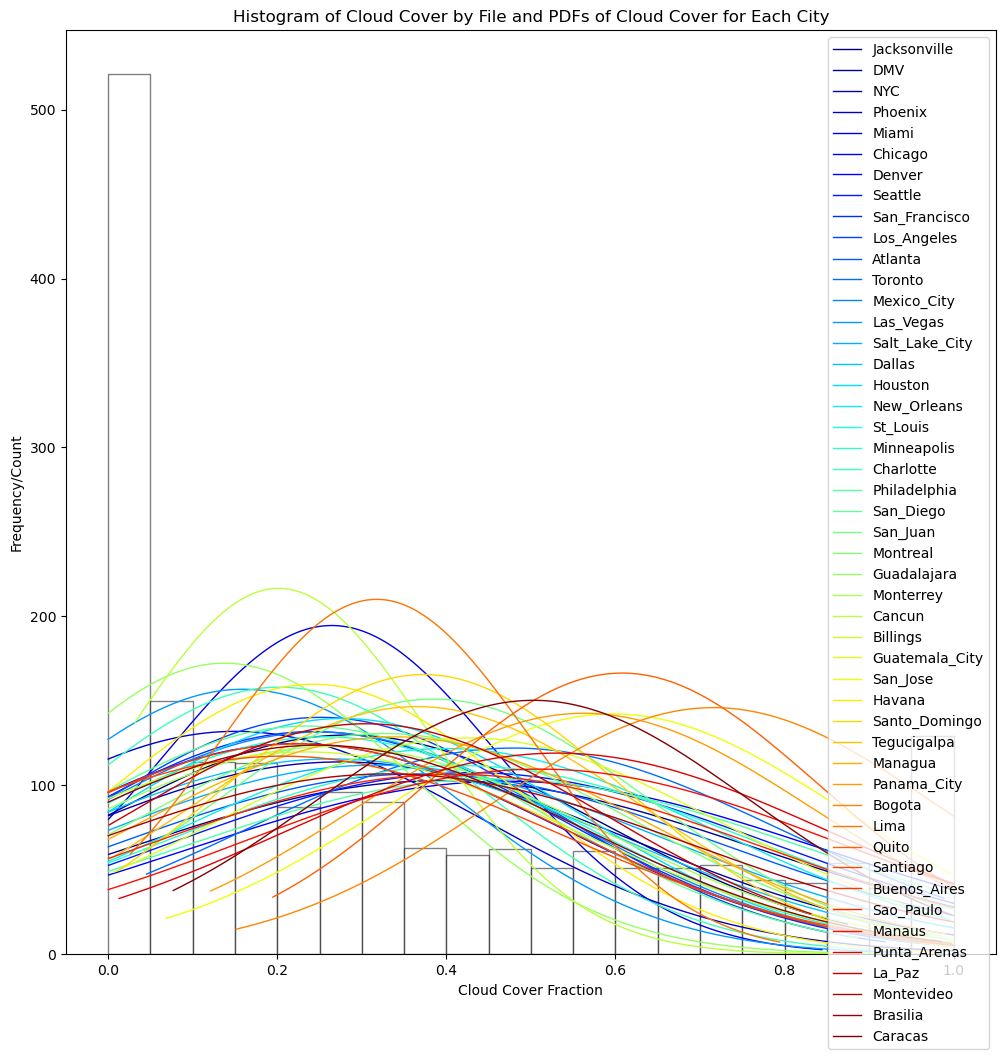

In [97]:
fig = plt.figure(figsize=(12, 12))
colors = cm.jet(np.linspace(0, 1, 48))
counts, bin_edges = np.histogram(city_data, bins=20)
area = np.sum(counts*(np.nanmax(city_data)-np.nanmin(city_data))/20)

i = 0
for city in cities:
    print(city)
    data = cloud_dict[city]
    
    mean = np.nanmean(data)
    std_dev = np.nanstd(data)
    x = np.linspace(np.nanmin(data), np.nanmax(data), 1000)
    pdf = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
    
    # Plot the line
    plt.plot(x, pdf * area, color=colors[i], linewidth=1)
    i += 1
    #if i > 5:
    #    break

plt.hist(city_data, bins=20, alpha=0.5, color='white', edgecolor='black')
plt.title('Histogram of Cloud Cover by File and PDFs of Cloud Cover for Each City')
plt.xlabel('Cloud Cover Fraction')
plt.ylabel('Frequency/Count')
plt.legend(cities, loc='upper right')
plt.show()

In [63]:
from datetime import datetime

In [94]:
date_dict = {string: [] for string in cities}
date_str_dict = {string: [] for string in cities}

In [95]:
format_string = "%Y%m%d%H%M"

for city in cities:
    print(city)
    city_list = glob.glob(dataset_root+city+'/processed_Landsat/*')
    for file in city_list:
        #print(file)
        dt_str = file.split('_')[-1].split('.')[0]
        dt = datetime.strptime(dt_str, format_string)
        date_dict[city].append(dt)
        date_str_dict[city].append(dt_str[:8])

Jacksonville
DMV
NYC
Phoenix
Miami
Chicago
Denver
Seattle
San_Francisco
Los_Angeles
Atlanta
Toronto
Mexico_City
Las_Vegas
Salt_Lake_City
Dallas
Houston
New_Orleans
St_Louis
Minneapolis
Charlotte
Philadelphia
San_Diego
San_Juan
Montreal
Guadalajara
Monterrey
Cancun
Billings
Guatemala_City
San_Jose
Havana
Santo_Domingo
Tegucigalpa
Managua
Panama_City
Bogota
Lima
Quito
Santiago
Buenos_Aires
Sao_Paulo
Manaus
Punta_Arenas
La_Paz
Montevideo
Brasilia
Caracas


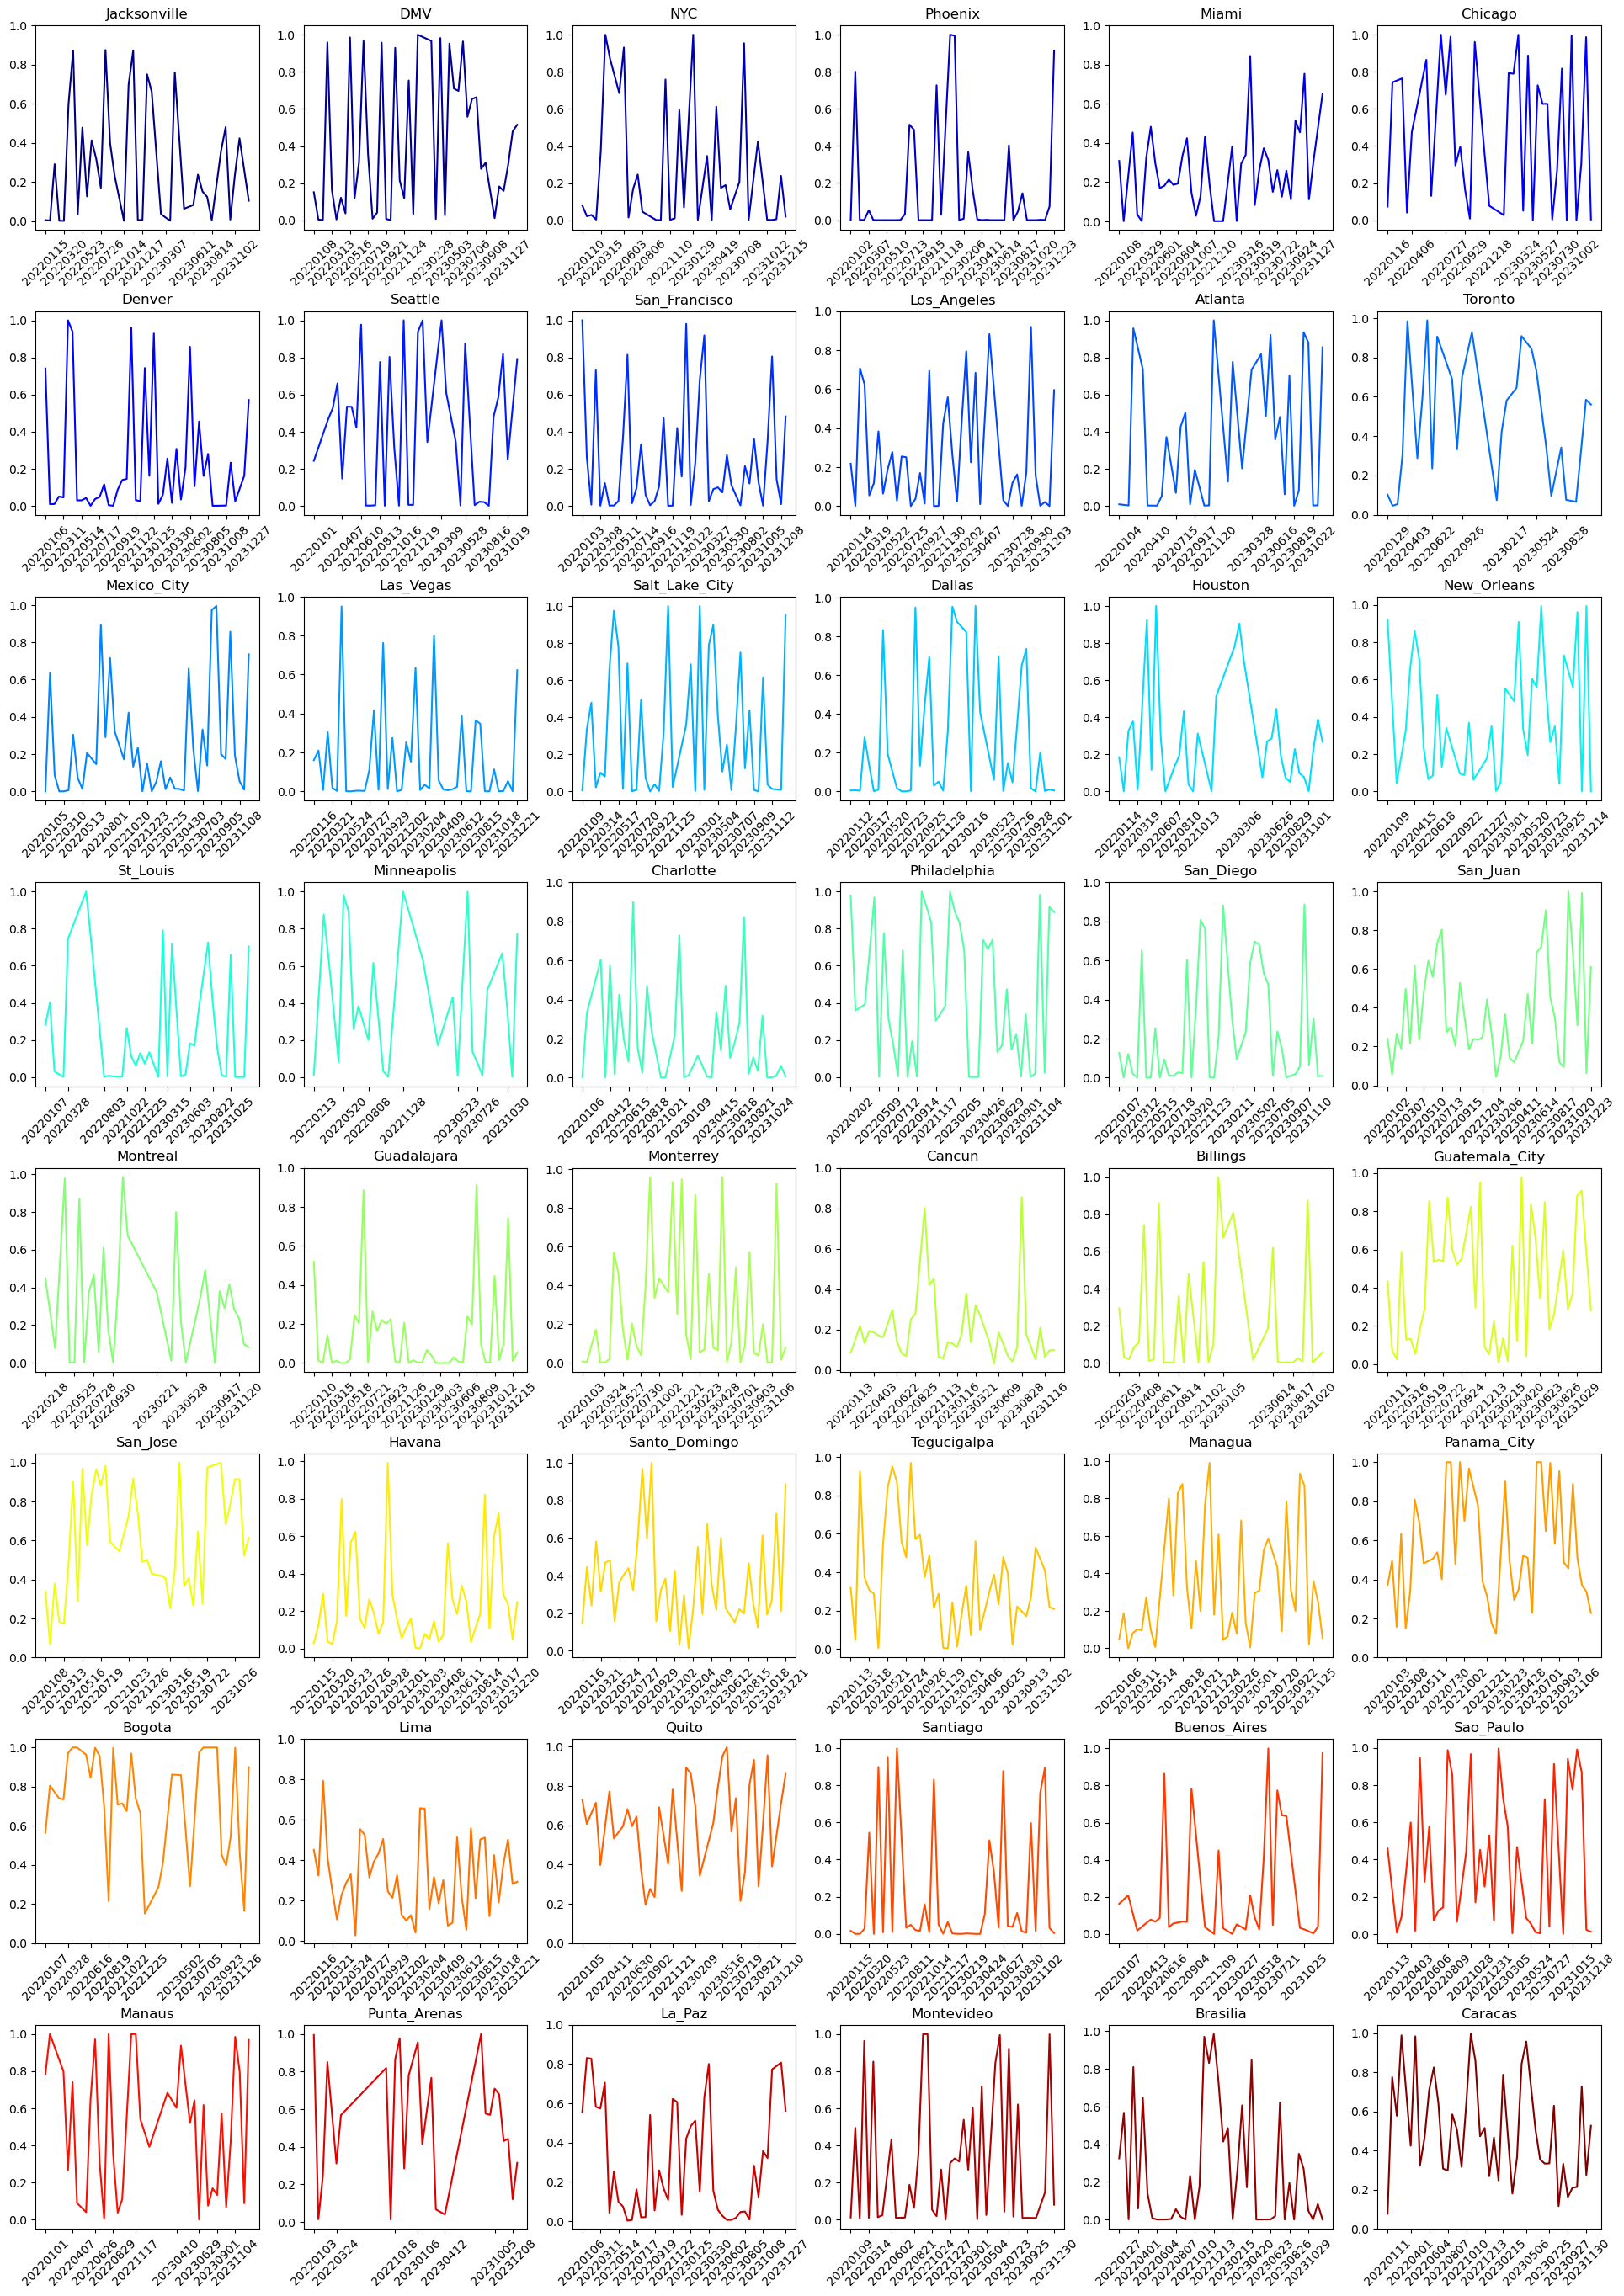

In [104]:
fig, axs = plt.subplots(8, 6)
fig.set_size_inches(24, 34)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.subplots_adjust(hspace=0.4)
colors = cm.jet(np.linspace(0, 1, 48))

i = 0
for ax in axs:
    for box in ax:
        box.plot(date_dict[cities[i]], cloud_dict[cities[i]], color=colors[i])
        box.set_xticks(date_dict[cities[i]][::4], labels=date_str_dict[cities[i]][::4], rotation=45)
        box.set_yticks(np.arange(0,1.01,0.2))
        box.set_title(cities[i])
        i += 1

In [68]:
date_dict['Phoenix']

[datetime.datetime(2022, 1, 2, 18, 4),
 datetime.datetime(2022, 1, 18, 18, 4),
 datetime.datetime(2022, 2, 3, 18, 4),
 datetime.datetime(2022, 2, 19, 18, 4),
 datetime.datetime(2022, 3, 7, 18, 4),
 datetime.datetime(2022, 3, 23, 18, 3),
 datetime.datetime(2022, 4, 8, 18, 3),
 datetime.datetime(2022, 4, 24, 18, 3),
 datetime.datetime(2022, 5, 10, 18, 3),
 datetime.datetime(2022, 5, 26, 18, 3),
 datetime.datetime(2022, 6, 11, 18, 4),
 datetime.datetime(2022, 6, 27, 18, 4),
 datetime.datetime(2022, 7, 13, 18, 4),
 datetime.datetime(2022, 7, 29, 18, 4),
 datetime.datetime(2022, 8, 14, 18, 4),
 datetime.datetime(2022, 8, 30, 18, 4),
 datetime.datetime(2022, 9, 15, 18, 4),
 datetime.datetime(2022, 10, 1, 18, 4),
 datetime.datetime(2022, 10, 17, 18, 4),
 datetime.datetime(2022, 11, 2, 18, 4),
 datetime.datetime(2022, 11, 18, 18, 4),
 datetime.datetime(2022, 12, 20, 18, 4),
 datetime.datetime(2023, 1, 5, 18, 4),
 datetime.datetime(2023, 1, 21, 18, 4),
 datetime.datetime(2023, 2, 6, 18, 4),
 da

## Old stuff

In [138]:
ds.Landsat_Cloud_Mask.values[0,0][-8] + ds.Landsat_Cloud_Mask.values[0,0][-4:-1]

'0110'

In [140]:
water = np.array([[s[-8]+s[-4:-1] for s in line] for line in ds.Landsat_Cloud_Mask.values])

In [141]:
mask = (water == '0000')*1

In [142]:
np.sum((ds.Landsat_LST)*mask == 0)

<xarray.DataArray 'Landsat_LST' ()>
array(3646546)

In [171]:
dss = ds.sel(x=slice(349000,368500)).sel(y=slice(4362500,4343000))

In [172]:
water = np.array([[s[-8]+s[-4:-1] for s in line] for line in dss.Landsat_Cloud_Mask.values])

In [173]:
mask = (water == '0000')*1

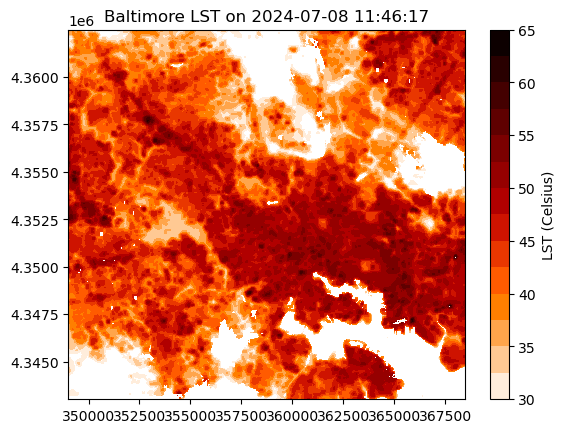

In [410]:
f=plt.figure()
ax = f.add_subplot()
plt.contourf(dss.x,dss.y,dss.Landsat_LST*mask-273.15,cmap=plt.cm.gist_heat_r, levels=np.linspace(30,65,15))
#ax.set_xticklabels(rotation=45)
#plt.xlabel('longitude')
#plt.ylabel('latitude')
plt.title(f'Baltimore LST on {ds.Datetime}')
cb=plt.colorbar(ticks = list(np.arange(30, 66, 5)))
cb.set_label('LST (Celsius)')
#plt.savefig('march_slp.png')

In [399]:
LSTs = np.array(dss.Landsat_LST*mask-273.15).flatten()

In [400]:
LSTs = LSTs[LSTs > 30]

In [401]:
np.max(LSTs)

61.47583015999999

(array([1.7001e+04, 3.4442e+04, 4.7326e+04, 5.8676e+04, 7.0451e+04,
        6.7363e+04, 4.8346e+04, 9.9920e+03, 6.4200e+02, 6.1000e+01]),
 array([30.002702  , 33.15001482, 36.29732763, 39.44464045, 42.59195326,
        45.73926608, 48.8865789 , 52.03389171, 55.18120453, 58.32851734,
        61.47583016]),
 <BarContainer object of 10 artists>)

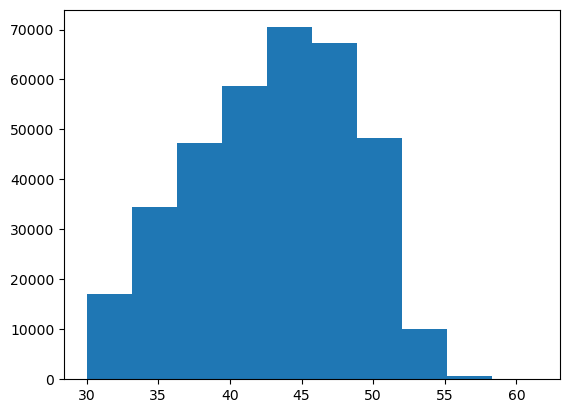

In [402]:
plt.hist(LSTs)

In [404]:
LSTs

array([35.06478962, 35.3348132 , 35.54673044, ..., 40.56780182,
       38.43837536, 36.12779384])

Text(0.5, 1.0, 'Baltimore LST Boxplot')

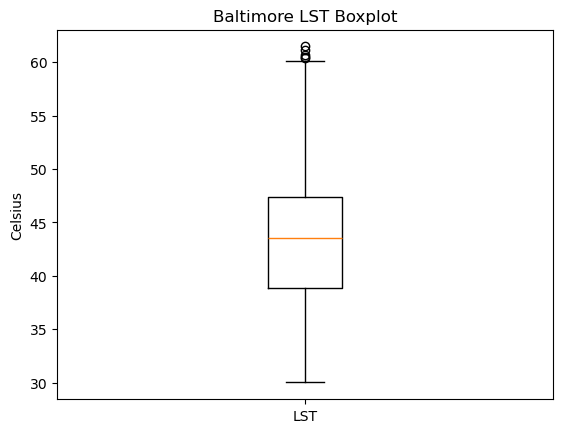

In [405]:
plt.boxplot(x=LSTs, labels=['LST'])
plt.ylabel('Celsius')
plt.title('Baltimore LST Boxplot')

In [406]:
q1 = np.percentile(LSTs, 25)
q3 = np.percentile(LSTs, 75)
iqr = q3 - q1

In [407]:
top_bound = q3+1.5*iqr
outliers = dss.Landsat_LST-273.15 > top_bound
outlier_y, outlier_x = np.where(outliers == True)

In [408]:
outlier_y

array([398, 398, 485, 485, 486, 486, 487, 509, 509, 510, 510, 511, 511,
       512])

In [409]:
outlier_x

array([633, 634, 623, 624, 623, 624, 624, 562, 563, 562, 563, 562, 563,
       562])

In [294]:
import utm

In [316]:
outlier_latlon = []

for i in list(range(len(outlier_y))):
    coord = utm.to_latlon(easting=dss.x[outlier_x[i]], northing=dss.y[outlier_y[i]], zone_number=18, northern=True)
    lat = coord[0].values
    lon = coord[1].values
    outlier_latlon.append((lat, lon)) 

outlier_latlon = np.array(outlier_latlon)

In [355]:
dss.x[outlier_x]

<xarray.DataArray 'x' (x: 42)>
array([367015., 367015., 367015., 352945., 352945., 352915., 352945., 352885.,
       352915., 352945., 352915., 353275., 353275., 349315., 349315., 368005.,
       368035., 367975., 368005., 368035., 368005., 368005., 367705., 367735.,
       367765., 367705., 367735., 367765., 367705., 367735., 365905., 365875.,
       365905., 365845., 365875., 365905., 365845., 365875., 365905., 365845.,
       365875., 365905.])
Coordinates:
  * x        (x) float64 3.67e+05 3.67e+05 3.67e+05 ... 3.659e+05 3.659e+05

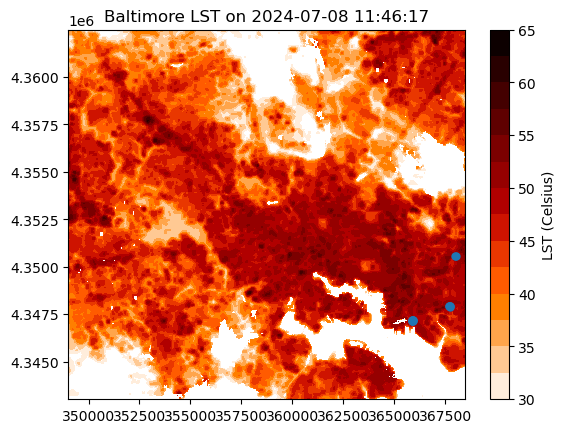

In [411]:
#ax = f.subplot()
#ax.scatter(outlier_latlon[:,0], outlier_latlon[:,1])
f2 = plt.figure(f)
plt.scatter(dss.x[outlier_x], dss.y[outlier_y], s=25, marker = 'o')
plt.show()